# Q1 a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('houses.csv')

#get Y, X, X1
Y = df['price (grands)']
X = df.iloc[:,1:16]
X1 = df['sqft_living']

df.describe(include='all')

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


Text(0.5,0,'sqft_living')

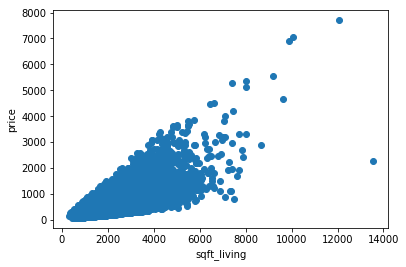

In [3]:
#It's more convenient to use np array for dot product operations, so I convert X, X1, Y to np array
Y = Y.values
X = X.values
X1 = X1.values

#I want to see how data points look like on a scatter plot
plt.scatter(X1, Y)
plt.ylabel('price')
plt.xlabel('sqft_living')

Text(0.5,0,'sqft_living')

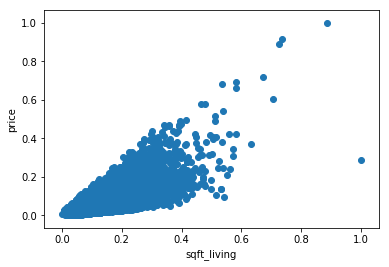

In [4]:
#I also normalize Y, X, and X1
Y = (Y-min(Y))/(max(Y)-min(Y))
for i in range(X.shape[1]):
    X[:,i] = (X[:,i]-min(X[:,i]))/(max(X[:,i])-min(X[:,i]))
X1 = (X1-min(X1))/(max(X1)-min(X1))

#after normalizing
plt.scatter(X1, Y)
plt.ylabel('price')
plt.xlabel('sqft_living')

As expected, normalizing doesn't affect the shape of the scatter plot.

# Q1 b)

In [5]:
def linear_regression(X, Y, lr, repetition):
    #number of feature columns in X
    num_features = X.shape[1]
    #number of data rows in X
    num_rows = X.shape[0]
    
    #each row is for each iteration, initially w = 1
    w1 = np.ones((1, num_features))
    w2 = np.array([1])
    L = np.array([])
    
    for iter in range(repetition - 1):
        #predict with the previous parameters
        y = predict(X, w1[-1], w2[-1])
        #I don't sum here because dot product already summed
        w1 = np.append(w1, w1[-1]-lr*(np.dot(X.T, (y-Y).reshape(num_rows,1))).reshape(1, num_features)/num_rows, axis=0)
        w2 = np.append(w2, w2[-1]-lr*sum(y-Y)/num_rows)
        #L is loss and also the MSE
        L = np.append(L, sum((y-Y)**2)/2/num_rows)
    
    return (w1, w2, L, y)
    

#predict Y based on X, w1, w2
# y = w1x + w2
# w1 is transposed because it was 1xcol format
def predict(X, w1, w2):    
    return np.dot(X, w1.T) + w2

lr = 10

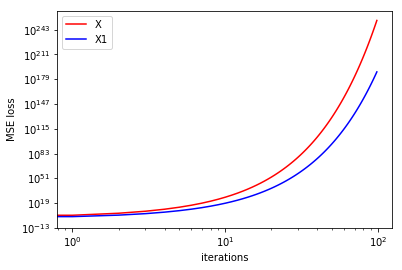

MSE for model obtained from X:
8.48002223310164e+254
MSE for model obtained from X1:
3.232199519723041e+188


In [6]:
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 10, 100)
plt.loglog(L_X, 'r', label = 'X')

# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 10, 100)
plt.loglog(L_X1, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_X[-1])
print('MSE for model obtained from X1:')
print(L_X1[-1])

For lr = 10, I only use 100 iterations, because there will be overflow if I use higher iterations. As the curve shows, the MSE is increasing as iterations increase, showing the model is not learning. This is because the learning rate is too high.

lr = 1

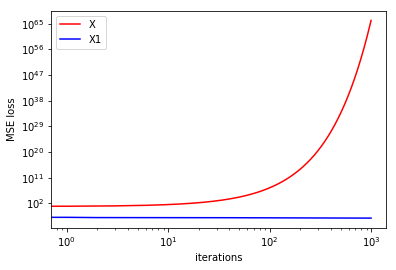

MSE for model obtained from X:
1.1803252161302856e+66
MSE for model obtained from X1:
0.0005878360831146675


In [7]:
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 1, 1000)
plt.loglog(L_X, 'r', label = 'X')

# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 1, 1000)
plt.loglog(L_X1, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_X[-1])
print('MSE for model obtained from X1:')
print(L_X1[-1])

If I use 10000 iterations, again there will be overflow. It seems to happen only with X predictor. The curve shows that with X input, the model is not learning and the loss in increasing. But with X1 input, the model is actually learning and the MSE of the final model is 0.0005878. Therefore, lr = 1 is too high for X but it's ok for X1.

lr = 0.1

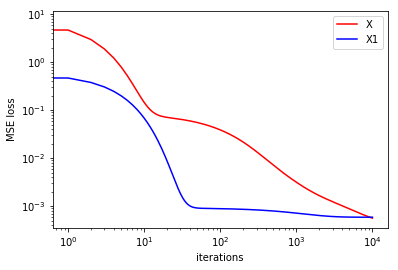

MSE for model obtained from X:
0.0005628043507701731
MSE for model obtained from X1:
0.000587836163283876


In [8]:
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 0.1, 10000)
plt.loglog(L_X, 'r', label = 'X')

# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 0.1, 10000)
plt.loglog(L_X1, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_X[-1])
print('MSE for model obtained from X1:')
print(L_X1[-1])

With lr = 0.1, the model from X is learning as well. Both models are now learning and loss is decreasing as iterations increase. The final MSE for both models are about 0.0006, which are alright. Also the X model has slightly lower MSE than X1 model.

lr = 0.01

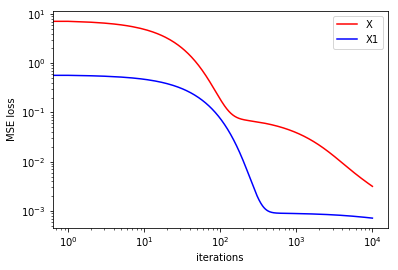

MSE for model obtained from X:
0.0031589341691749895
MSE for model obtained from X1:
0.0007152712887398402


In [9]:
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 0.01, 10000)
plt.loglog(L_X, 'r', label = 'X')

# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 0.01, 10000)
plt.loglog(L_X1, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_X[-1])
print('MSE for model obtained from X1:')
print(L_X1[-1])

With lr = 0.01, both models are still learning, which is expected. But the final MSE is actually higher than when lr is 0.1, this is expected because with a lower learning rate, the gradient is slower at converging. This shows that the sweet spot learning rate for 10000 iterations is 0.1. Also the X1 model has less MSE than the X model.

lr = 0.001

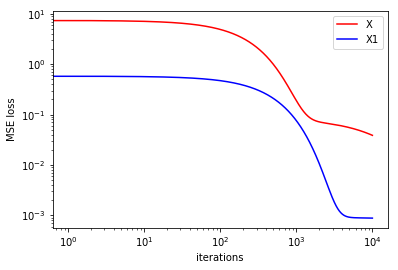

MSE for model obtained from X:
0.038823118051577205
MSE for model obtained from X1:
0.000885755723137271


In [10]:
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 0.001, 10000)
plt.loglog(L_X, 'r', label = 'X')

# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 0.001, 10000)
plt.loglog(L_X1, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_X[-1])
print('MSE for model obtained from X1:')
print(L_X1[-1])

With lr = 0.001, I see the same observation as the last trial. Both models are learning, but they are converging slower because learning rate is less, so the final MSE is higher. Also X1 model has less MSE than the X model.

# Q1 c)

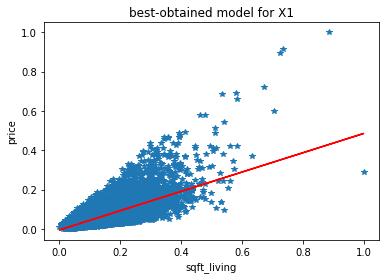

In [11]:
# as discussed previously, lr = 0.1 is the best for 10000 iterations
# X1
w1_X1, w2_X1, L_X1, y_X1 = linear_regression(X1.reshape(21613,1), Y, 0.1, 10000)

#plot
plt.plot(X1, Y, '*')
plt.plot(X1, X1*w1_X1[-1]+w2_X1[-1], 'r')
plt.title('best-obtained model for X1')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

The plot above shows the scattered data and the linear model obtained with X1, from the look of it, the model doesn't look very good because it feels like there are more data on the top side of the linear model.

In [12]:
# firstly get model with X, again lr is 0.1
# X
w1_X, w2_X, L_X, y_X = linear_regression(X, Y, 0.1, 10000)

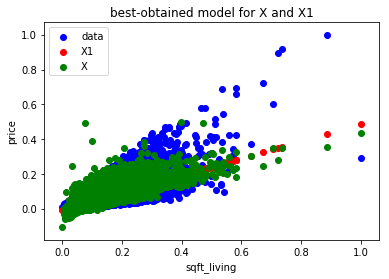

In [13]:
#For plotting both X and X1 models, I just use the y_X and y_X1 array returned by linear regression

#plot
plt.scatter(X1, Y, c='b', label='data')
plt.scatter(X1, y_X1, c='r', label='X1')
plt.scatter(X1, y_X, c='g', label='X')
plt.title('best-obtained model for X and X1')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend()
plt.show()

Previously, we saw that when lr = 0.1, X model has slightly lower MSE than X1 model. The plot shows that X model points are more distributed and are more closer to the original price than the X1 model predicted prices. X1 model is linear. X model is also linear but appears not linear because the x-axis is sqft_living alone.

From this plot, I guess it shows that sqft_living alone doesn't capture the price, there are other latent factors. X doesn't model the price completely as well, for example, we didn't consider location, but X considers more latent factors than X1 alone.

# Q1 d)

gamma is the hyperparameter for the regularization penalty

based on the manuscript, the gradient descent for the regularized loss function with quadratic penalty term is 

w <- (1 - 2 * lr * gamma) * w - lr * nabla(L)

so I just change w to (1 - 2 * lr * gamma) * w

I also add the penalty term to the L



In [20]:
def linear_regression_ridge(X, Y, lr, repetition, gamma):
    #number of feature columns in X
    num_features = X.shape[1]
    #number of data rows in X
    num_rows = X.shape[0]
    
    #each row is for each iteration, initially w = 1
    w1 = np.ones((1, num_features))
    w2 = np.array([1])
    L = np.array([])
    
    for iter in range(repetition - 1):
        #predict with the previous parameters
        y = predict(X, w1[-1], w2[-1])
        #I don't sum here because dot product already summed
        w1 = np.append(w1, w1[-1]*(1-2*lr*gamma)-lr*(np.dot(X.T, (y-Y).reshape(num_rows,1))).reshape(1, num_features)/num_rows, axis=0)
        w2 = np.append(w2, w2[-1]*(1-2*lr*gamma)-lr*sum(y-Y)/num_rows)
        #L is loss and also the MSE
        L = np.append(L, sum((y-Y)**2)/2/num_rows + gamma*(sum(w1[-1]**2) + w2[-1]**2))
    
    return (w1, w2, L, y)

lr = 0.1 and gamma = 0.1

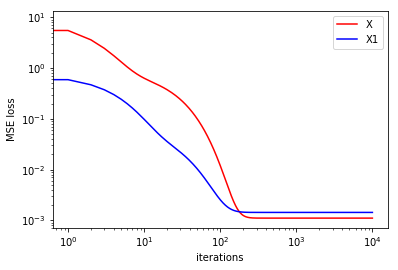

MSE for model obtained from X:
0.0011089536379669544
MSE for model obtained from X1:
0.0014358659822089478


In [21]:
# X
w1_Xr, w2_Xr, L_Xr, y_Xr = linear_regression_ridge(X, Y, 0.1, 10000, 0.1)
plt.loglog(L_Xr, 'r', label = 'X')

# X1
w1_X1r, w2_X1r, L_X1r, y_X1r = linear_regression_ridge(X1.reshape(21613,1), Y, 0.1, 10000, 0.1)
plt.loglog(L_X1r, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_Xr[-1])
print('MSE for model obtained from X1:')
print(L_X1r[-1])

So I set lr = 0.1 and gamma = 0.1, the result look pretty good. Both models are learning and loss decreased to 0.001. It is good to note that compared to the case of lr=0.1 without ridge regression, this model converged earlier, and has higher loss. The case without ridge regression achieved MSE of 0.0005.

However, next I will show you that just looking at the loss curve gives us misunderstanding, and the model is in fact very bad model even though the loss appears to be low.

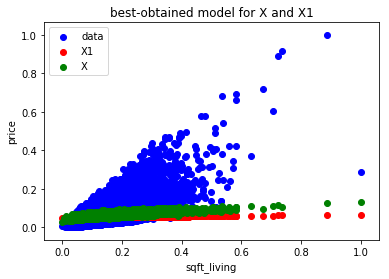

In [22]:
#plot ridge predictions
plt.scatter(X1, Y, c='b', label='data')
plt.scatter(X1, y_X1r, c='r', label='X1')
plt.scatter(X1, y_Xr, c='g', label='X')
plt.title('best-obtained model for X and X1')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend()
plt.show()

In [23]:
print('w1 for X1: ', w1_X1[-1])
print('w2 for X1: ', w2_X1[-1])

print('w1 for X1 ridge: ', w1_X1r[-1])
print('w2 for X1 ridge: ', w2_X1r[-1])

w1 for X1:  [0.49093656]
w2 for X1:  -0.005325980245368424
w1 for X1 ridge:  [0.01787938]
w2 for X1 ridge:  0.048816581589167844


From the plot, we can see that the both X and X1 models are very poor, they have large bias and doesn't predict the prices at all. If we look at the parameters of the ridge X1 model, we can find the same conclusion, the slope term (w1) is very low, causing the poor approximation of the model.

However, the loss appears low? After investigation, I finally figured out why this is so.

This is because I normalized the data to 0 to 1, so y and Y are also between 0 and 1, but we are finding the MSE, so we are squaring y-Y, but y-Y is between 0 and 1, so the squared value is smaller. We also divide the result by 2*numRows, further reducing the affect of the MSE term. With Ridge regression, the loss is made of 2 parts, MSE and penalty term. With MSE becoming insignificant, the penalty term is over-emphasized. So, the gradient descent is not improving the paramters to decrease MSE, but decreasing parameters to decrease the penalty term.

This didn't cause problem for the original linear regression, because that didn't have a regularization term, so MSE made up of loss. However, now with the regularization term, the loss function becomes almost the regularization function.

This is why the loss appears low but the model is very bad. It is because MSE doesn't affect loss as much as the penalty term does.

However, I have a dilemma because I must normalize the data, otherwise, I face overflow issues for learning rates between 10 to 0.001. But with normalization, Ridge regression doesn't work very well.

I propose some ways to resolve this issue. I will try to make gamma really low, that should make the penalty term less influential.

It's also possible to use other types of loss function other than MSE, but I don't know how to derive the nabla for them.

I think I can also make it work if I use a very low learning rate without normalization, then the MSE squared problem is resolved.

I will keep lr at 0.1, and try some different values of gamma.

lr = 0.1 and gamma = 0

As expected, it is the same as without ridge regression.

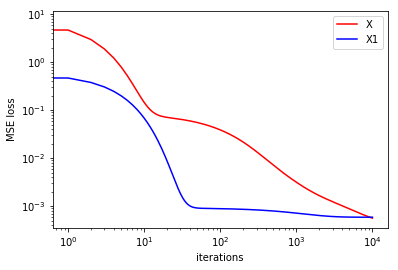

MSE for model obtained from X:
0.0005628043507701731
MSE for model obtained from X1:
0.000587836163283876


In [24]:
# X
w1_Xr, w2_Xr, L_Xr, y_Xr = linear_regression_ridge(X, Y, 0.1, 10000, 0)
plt.loglog(L_Xr, 'r', label = 'X')

# X1
w1_X1r, w2_X1r, L_X1r, y_X1r = linear_regression_ridge(X1.reshape(21613,1), Y, 0.1, 10000, 0)
plt.loglog(L_X1r, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_Xr[-1])
print('MSE for model obtained from X1:')
print(L_X1r[-1])

lr = 0.1 and gamma = 0.5

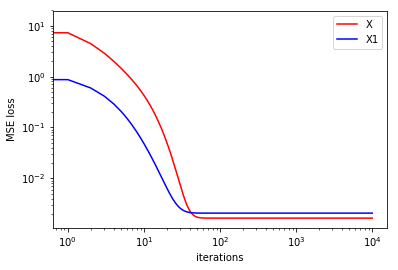

MSE for model obtained from X:
0.0016505058342884196
MSE for model obtained from X1:
0.0020685592750048585


In [25]:
# X
w1_Xr, w2_Xr, L_Xr, y_Xr = linear_regression_ridge(X, Y, 0.1, 10000, 0.5)
plt.loglog(L_Xr, 'r', label = 'X')

# X1
w1_X1r, w2_X1r, L_X1r, y_X1r = linear_regression_ridge(X1.reshape(21613,1), Y, 0.1, 10000, 0.5)
plt.loglog(L_X1r, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_Xr[-1])
print('MSE for model obtained from X1:')
print(L_X1r[-1])

When I increased gamma from 0.1 to 0.5, two things happened.

1. Models converged faster.
2. Final loss got higher.

As we discussed previously, the loss is mostly about the penalty term because MSE is not affecting loss as much due to the (y-Y)^2 problem.

So, as we increased the gamma, the penalty term plays a even higher role, causing the final loss to be higher.

lr = 0.1 and gamma = 0.01

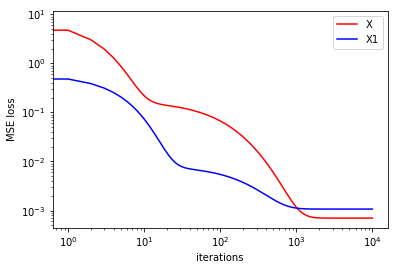

MSE for model obtained from X:
0.0007004690000239785
MSE for model obtained from X1:
0.0010708920970642793


In [27]:
# X
w1_Xr, w2_Xr, L_Xr, y_Xr = linear_regression_ridge(X, Y, 0.1, 10000, 0.01)
plt.loglog(L_Xr, 'r', label = 'X')

# X1
w1_X1r, w2_X1r, L_X1r, y_X1r = linear_regression_ridge(X1.reshape(21613,1), Y, 0.1, 10000, 0.01)
plt.loglog(L_X1r, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_Xr[-1])
print('MSE for model obtained from X1:')
print(L_X1r[-1])

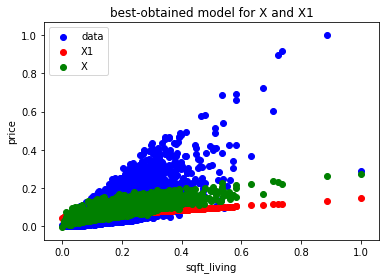

In [28]:
#plot ridge predictions
plt.scatter(X1, Y, c='b', label='data')
plt.scatter(X1, y_X1r, c='r', label='X1')
plt.scatter(X1, y_Xr, c='g', label='X')
plt.title('best-obtained model for X and X1')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend()
plt.show()

Expectedly, as gamma decreases, the penalty term influence is less, and the curve is closer to the case without ridge regression. Also, the model is slightly better than before. So, my idea of decreasing gamma works.

lr = 0.1 and gamma = 0.0001

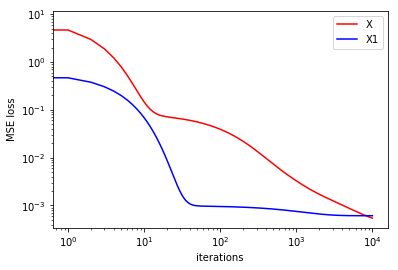

MSE for model obtained from X:
0.0005445191766546488
MSE for model obtained from X1:
0.0006106596990472173


In [29]:
# X
w1_Xr, w2_Xr, L_Xr, y_Xr = linear_regression_ridge(X, Y, 0.1, 10000, 0.0001)
plt.loglog(L_Xr, 'r', label = 'X')

# X1
w1_X1r, w2_X1r, L_X1r, y_X1r = linear_regression_ridge(X1.reshape(21613,1), Y, 0.1, 10000, 0.0001)
plt.loglog(L_X1r, 'b', label = 'X1')

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# the last value in L is the MSE of the last iteration, which is the MSE of the model
print('MSE for model obtained from X:')
print(L_Xr[-1])
print('MSE for model obtained from X1:')
print(L_X1r[-1])

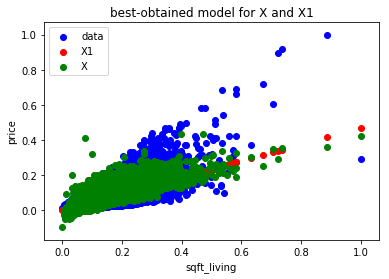

In [30]:
#plot ridge predictions
plt.scatter(X1, Y, c='b', label='data')
plt.scatter(X1, y_X1r, c='r', label='X1')
plt.scatter(X1, y_Xr, c='g', label='X')
plt.title('best-obtained model for X and X1')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend()
plt.show()

In [31]:
print('w1 for X1: ', w1_X1[-1])
print('w2 for X1: ', w2_X1[-1])

print('w1 for X1 ridge: ', w1_X1r[-1])
print('w2 for X1 ridge: ', w2_X1r[-1])

w1 for X1:  [0.49093656]
w2 for X1:  -0.005325980245368424
w1 for X1 ridge:  [0.47098136]
w2 for X1 ridge:  -0.0026295553487589844


Exactly as my hypothesis suggested, when I decrease gamma to 0.0001, the models are good again, because the weight of the penalty term is decreased and the MSE term is important again.

If we look at the parameters, we can see that in this case, the parameters created from basic linear regression is not really overfitted. It may appears that parameters of Ridge models are smaller but that also means the model is less accurate.

In conclusion, Ridge regression models have higher loss than the models without Ridge regression and overfitting isn't an issue in this case. So, it is better to not use Ridge regression in this case.

There is a problem when I plotted the Ridge model predictions vs real prices. The Ridge models have very large bias, they don't predict very well, but the loss is low. After investigation, I figure it's because I normalized the data, and used MSE. After normalization, data fall between 0 and 1, so when I calculate MSE, I have (y-Y)^2, but y-Y is between 0 and 1 too, so the square is smaller. This was ok without the regularization loss term, but with the loss term, the loss function gives too much empahsis on the regularization term and don't care about the MSE too much (because of the squared problem).

This is problematic because normalization is necessary, without normalization, I experiences overflow for learning rate from 10 to 0.001 (which the question is asking for), but with normalization, MSE doesn't work very well.

This problem is resolved by making gamma very small, reducing the weight of the penalty term.

# Q2

a) Causal model drawn is in the pdf

b-e) are provided below

In [3]:
from lea import *

# the starting nodes
alternatorBroken = Lea.boolProb(1, 1000)
fanBeltBroken = Lea.boolProb(2, 100)

# the other nodes
batteryNotCharging = Lea.buildCPT(
    (alternatorBroken | fanBeltBroken , Lea.boolProb(1, 1)),
    (~alternatorBroken & ~fanBeltBroken , Lea.boolProb(5, 1000))
)

batteryIsFlat = Lea.buildCPT(
    (batteryNotCharging , Lea.boolProb(90, 100)),
    (~batteryNotCharging , Lea.boolProb(10, 100))
)

carNotStart = Lea.buildCPT(
    (batteryIsFlat , Lea.boolProb(1, 1)),
    (~batteryIsFlat , Lea.boolProb(5, 100))
)

print('2.b) What is the probability that the alternator is broken given that the car won’t start?')
print(Pf(alternatorBroken.given(carNotStart)))

print('\n2.c) What is the probability that the fan belt is broken given that the car won’t start?')
print(Pf(fanBeltBroken.given(carNotStart)))

print('\n2.d) What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?')
print(Pf(fanBeltBroken.given(carNotStart & alternatorBroken)))

print('\n2.e) What is the probability that the alternator and the fan belt is broken given that the car won’t start?')
print(Pf((alternatorBroken & fanBeltBroken).given(carNotStart)))

2.b) What is the probability that the alternator is broken given that the car won’t start?
0.005496004507962575

2.c) What is the probability that the fan belt is broken given that the car won’t start?
0.1099200901592515

2.d) What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?
0.02

2.e) What is the probability that the alternator and the fan belt is broken given that the car won’t start?
0.0001099200901592515


#  Q3
Handed-in during class